Label Preparation

In [11]:
#This code is copied and further customized/changed from Tobias Bosch his work, 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#df1 = pd.read_csv("SuJu16jan7_11juli17.csv")
#df1 = pd.read_csv("KN5jan7_12sep2017TU.csv")
#df1 = pd.read_csv("ReKe10jan7_20012016_revised.csv")
#df1 = pd.read_csv("PiKe4jan7_11juli17_TU.csv")

In [3]:
#signer IDs
#Switch out signer ID columns to (0:,0) for SuJu and (1:, 1) for the rest
signers = df1.iloc[0:, 0]
signer_id = []

for ID in signers:
    if ID not in signer_id:
        signer_id.append(ID)
        
print(signer_id)
print(df1['Unnamed: 0'])

['Translation Engl 1', 'Translation Engl 2']
0      Translation Engl 1
1      Translation Engl 1
2      Translation Engl 1
3      Translation Engl 1
4      Translation Engl 1
              ...        
371    Translation Engl 2
372    Translation Engl 2
373    Translation Engl 2
374    Translation Engl 2
375    Translation Engl 2
Name: Unnamed: 0, Length: 376, dtype: object


In [4]:
#switch out Translation 1 for Translation Engl 1 and Translation 2 for Translation Engl 2.
signer1translation = df1[df1['Unnamed: 0'] == 'Translation Engl 1']
signer2translation = df1[df1['Unnamed: 0'] == 'Translation Engl 2']
totalsign = [signer1translation, signer2translation]
#print(totalsign)
df = pd.concat(totalsign)
print(len(df))

#print(len(signer1translation))

376


In [5]:
#make new df with signer,begin time, end time
#Replace 0 with 1 for SuJu

newdf = df.drop(df.columns[[1,2,4,6,7,8]], axis = 1, inplace = False)

#here we specify the amount of frames to be extracted from the ELAN files
amount_of_frames_to_be_extracted = 900
#make rows for new dataframe
rows = []
for i in range(1,amount_of_frames_to_be_extracted+1):
    rows.append(i)

#make a list of tuples with the signer,begin time, end time
timelist = []
newtimes = []
for index, row in newdf.iterrows():
    timelist.append((row[0],row[1],row[2]))

print(newdf)
#print(len(newdf))
#We only want a certain amount of frames and thus also a certain amount of seconds

             Unnamed: 0    BT(ms)    ET(ms)
0    Translation Engl 1    16.491    17.651
1    Translation Engl 1    17.701    19.771
2    Translation Engl 1    20.111    22.251
3    Translation Engl 1    22.311    24.341
4    Translation Engl 1    24.361    26.071
..                  ...       ...       ...
371  Translation Engl 2  1433.746  1438.186
372  Translation Engl 2  1438.256  1443.116
373  Translation Engl 2  1444.011  1446.321
374  Translation Engl 2  1456.971  1459.601
375  Translation Engl 2  1460.131  1463.721

[376 rows x 3 columns]


In [6]:
for times in timelist:
    if times[1]<= amount_of_frames_to_be_extracted:
        newtimes.append(times)

        
print(newtimes)
print(len(newtimes))

[('Translation Engl 1', 16.491, 17.651), ('Translation Engl 1', 17.701, 19.771), ('Translation Engl 1', 20.111, 22.251), ('Translation Engl 1', 22.311, 24.341), ('Translation Engl 1', 24.361, 26.071), ('Translation Engl 1', 26.404, 29.854), ('Translation Engl 1', 30.034, 31.674), ('Translation Engl 1', 31.704, 32.164), ('Translation Engl 1', 39.687, 40.267), ('Translation Engl 1', 40.972, 42.107), ('Translation Engl 1', 43.564, 44.384), ('Translation Engl 1', 44.684, 45.194), ('Translation Engl 1', 60.244, 65.884), ('Translation Engl 1', 69.354, 70.944), ('Translation Engl 1', 80.544, 88.074), ('Translation Engl 1', 115.534, 117.614), ('Translation Engl 1', 117.906, 119.926), ('Translation Engl 1', 120.829, 123.529), ('Translation Engl 1', 123.569, 124.779), ('Translation Engl 1', 124.989, 126.589), ('Translation Engl 1', 140.684, 142.994), ('Translation Engl 1', 143.514, 145.214), ('Translation Engl 1', 145.304, 147.784), ('Translation Engl 1', 147.844, 148.424), ('Translation Engl 1'

In [10]:
#creates a list per signer containing frames they signed in  
def time_of_signing(signer):
    signer_times = []
    for times in newtimes:
        if times[0]==signer_id[signer]:
            signer_times.append((times[0],int(times[1]),int(times[2])))
    return signer_times

signer1_times = time_of_signing(0)
signer2_times = time_of_signing(1)

#get all the frames in which they are signing
def frames(signingtime):
    framessigner = []
    for times in signingtime:
        for i in range(times[1],times[2]+1):
            framessigner.append(i)
    return framessigner


framessigner1 = frames(signer1_times)
framessigner2 = frames(signer2_times)

print(len(framessigner1))
print(len(framessigner2))

#creates a list per signer giving as output a list of 0's and 1's 1 = signing 0 = not signing
def binary(frames):
    diarization = []
    for i in range(1,amount_of_frames_to_be_extracted+1):
        if i in frames:
            diarization.append(1)
        else:
            diarization.append(0)
    return diarization

diarization1 = binary(framessigner1)
diarization2 = binary(framessigner2)


#function to create another list with 4 classes described in the function
def class_maker(a,b):
    class_column = []
    for i in range(0,len(a)):
        #both signers not signing
        if a[i] == 0 and b[i]== 0:
            class_column.append(0)
        #both signers siging
        if a[i] == 1 and b[i]== 1:
            class_column.append(3)
        #signer 1 signing 
        if a[i] == 1 and b[i] == 0:
            class_column.append(1)
        #signer 2 signing 
        if a[i] == 0 and b[i] == 1:
            class_column.append(2)
    return class_column

classes = class_maker(diarization1,diarization2)

#function to merge 3 lists
def merge_lists(a,b,c,d):
    mergeds = []
    for i in range(0, len(a)):
        merged = []
        merged.append(a[i])
        merged.append(b[i])
        merged.append(c[i])
        merged.append(d[i])
        mergeds.append(tuple(merged))
    return mergeds

signdiarization = merge_lists(rows,diarization1,diarization2,classes)
#print(signdiarization)

[('Translation Engl 1', 16, 17), ('Translation Engl 1', 17, 19), ('Translation Engl 1', 20, 22), ('Translation Engl 1', 22, 24), ('Translation Engl 1', 24, 26), ('Translation Engl 1', 26, 29), ('Translation Engl 1', 30, 31), ('Translation Engl 1', 31, 32), ('Translation Engl 1', 39, 40), ('Translation Engl 1', 40, 42), ('Translation Engl 1', 43, 44), ('Translation Engl 1', 44, 45), ('Translation Engl 1', 60, 65), ('Translation Engl 1', 69, 70), ('Translation Engl 1', 80, 88), ('Translation Engl 1', 115, 117), ('Translation Engl 1', 117, 119), ('Translation Engl 1', 120, 123), ('Translation Engl 1', 123, 124), ('Translation Engl 1', 124, 126), ('Translation Engl 1', 140, 142), ('Translation Engl 1', 143, 145), ('Translation Engl 1', 145, 147), ('Translation Engl 1', 147, 148), ('Translation Engl 1', 148, 150), ('Translation Engl 1', 150, 153), ('Translation Engl 1', 178, 182), ('Translation Engl 1', 183, 186), ('Translation Engl 1', 186, 195), ('Translation Engl 1', 225, 235), ('Transla

In [170]:
#create columns for the new df
column = ["frames"]
column.extend(signer_id)
column.append("class")

#create new df
df = pd.DataFrame(signdiarization,columns=(column))

print(column)
#print(df[:50])
count = df['class'].value_counts()
print(count)

['frames', 'Translation Engl 1', 'Translation Engl 2', 'class']
2    442
1    188
0    139
3    131
Name: class, dtype: int64


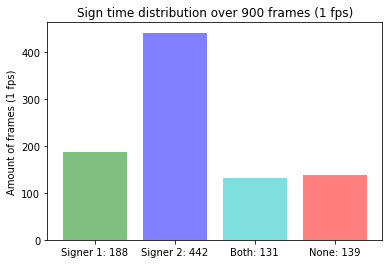

In [171]:
#df.to_csv("PiKe4jan7_11juli2017_annotated", index = False)
#df.to_csv("KN5jan7_annotated", index = False)
#df.to_csv("Reke10jan7_annotated", index = False)
df.to_csv("SuJu16jan7_annotated", index = False)
#count = df['class'].value_counts()
#countdf = pd.DataFrame(count)

#%% visualisation %%#
#check how often signers sign at the same time 
both_signing = len(df[(df.iloc[:,1] == 1) & (df.iloc[:,2] == 1)].index.tolist())
#both signers not signing 
no_signing = len(df[(df.iloc[:,1] == 0) & (df.iloc[:,2] == 0)].index.tolist())
#signer 1 signing but not signer 2
signer_1 = len(df[(df.iloc[:,1] == 1) & (df.iloc[:,2] == 0)].index.tolist())
#signer 2 signing but not signer 1 
signer_2 = len(df[(df.iloc[:,1] == 0) & (df.iloc[:,2] == 1)].index.tolist())


objects = ( "Signer 1: "+str(signer_1), "Signer 2: "+str(signer_2),
           "Both: "+str(both_signing), "None: "+str(no_signing))
y_pos = np.arange(len(objects))
performance = [signer_1,signer_2,both_signing,no_signing]
colours = ["g", "b", "c","r"]
fig = plt.figure(facecolor=(1, 1, 1))
bars = plt.bar(y_pos, performance, align='center', alpha=0.5, color = colours)
plt.xticks(y_pos, objects)


plt.ylabel('Amount of frames (1 fps)')
plt.title("Sign time distribution over "+str(amount_of_frames_to_be_extracted) + " frames (1 fps)")

#plt.bar_label()

#Change name per file
#plt.savefig('PiKe_signtime.png')
#plt.savefig('KN5_signtime.png')
#plt.savefig('ReKe_signtime.png')
plt.savefig('SuJu_signtime.png')
plt.show()
